# Automatically generating object masks with SAM

This code was used to test Segment Anything Model (SAM) for the Fashionpedia dataset. To run it, Google Colab must be used.

## Environment Set-up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

path = r'/content/drive/My Drive/MAI/OR/Fashionpedia/'

import zipfile

zip_ref = zipfile.ZipFile(path + "test.zip", 'r')
zip_ref.extractall("")
zip_ref.close()

zip_ref = zipfile.ZipFile(path + "val.zip", 'r')
zip_ref.extractall("")
zip_ref.close()

zip_ref = zipfile.ZipFile(path + "train.zip", 'r')
zip_ref.extractall("")
zip_ref.close()

zip_ref = zipfile.ZipFile(path + "seg_val.zip", 'r')
zip_ref.extractall("")
zip_ref.close()

zip_ref = zipfile.ZipFile(path + "seg_train.zip", 'r')
zip_ref.extractall("")
zip_ref.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

    
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

PyTorch version: 2.0.0+cu118
Torchvision version: 0.15.1+cu118
CUDA is available: True
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-4bx6rejr
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-4bx6rejr
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 567662b0fd33ca4b022d94d3b8de896628cd32dd
  Preparing metadata (setup.py) ... done
--2023-04-24 16:45:59--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 52.84.125.87, 52.84.125.71, 52.84.125.2, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|52.84.125.87|:443... connected.
HTTP request sent, awai

## Set-up

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [ ]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.35)))

## Fashionpedia images

We created a function to read Fashionpedia images and segment them by using SAM.

In [ ]:
import sys
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
def compare_segmentation(path):
  image = cv2.imread(path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(5,5))
  plt.imshow(image)
  plt.title('Original Image')
  plt.axis('off')
  plt.show()

  sys.path.append("..")
  sam_checkpoint = "sam_vit_h_4b8939.pth"
  model_type = "vit_h"
  device = "cuda"

  sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
  sam.to(device=device)

  mask_generator = SamAutomaticMaskGenerator(sam)
  masks = mask_generator.generate(image)

  plt.figure(figsize=(5,5))
  plt.imshow(image)
  show_anns(masks)
  plt.axis('off')
  plt.title('Segmentation mask')
  plt.show() 

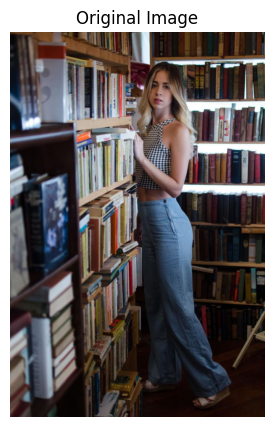

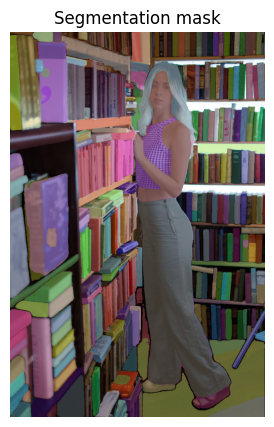

In [ ]:
compare_segmentation('/content/val/02916664cd606bb5486353f200a475a3.jpg')

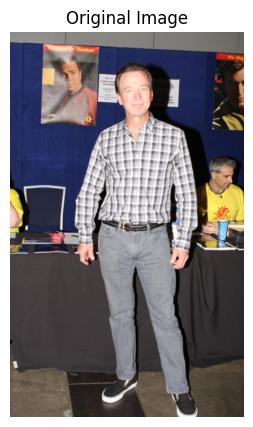

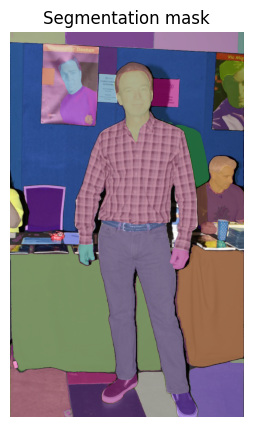

In [ ]:
compare_segmentation('/content/val/0a45b6b033bf0077a15f484e98f3dbfe.jpg')

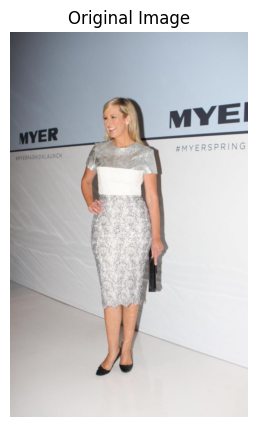

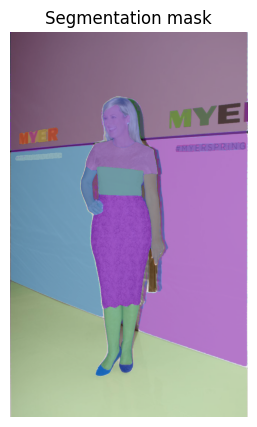

In [ ]:
compare_segmentation('/content/val/3109762baa95cfc50b5a454db19d4143.jpg')

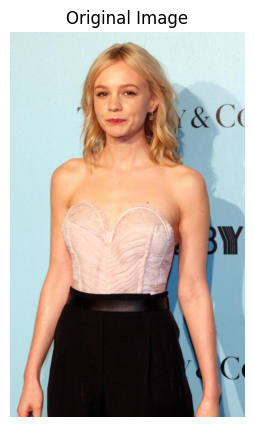

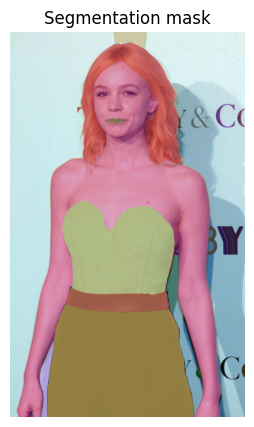

In [ ]:
compare_segmentation('/content/val/fd5e95a00bcee9d241c1bca1bf4c16c0.jpg')

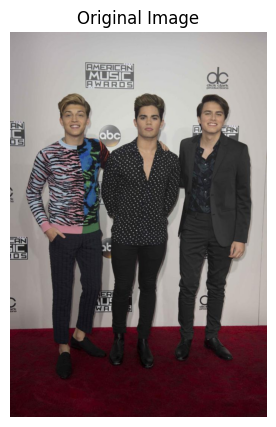

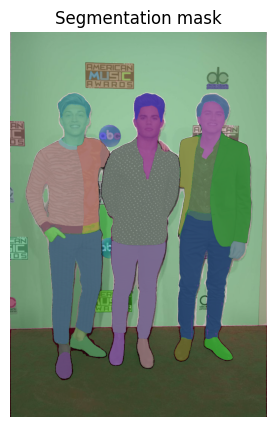

In [ ]:
compare_segmentation('/content/train/0d9fbd8432dd8e0b86ea211d42d361fe.jpg')

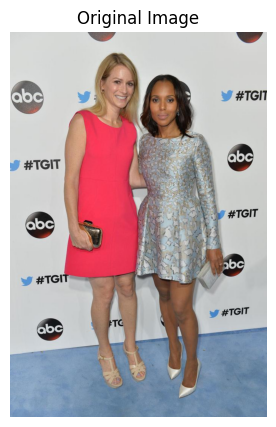

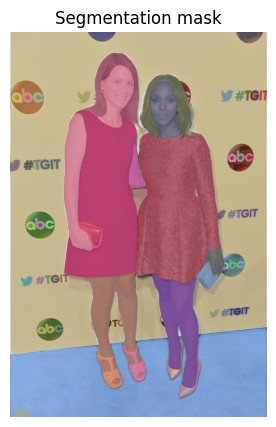

In [ ]:
compare_segmentation('/content/train/9c0c857621813d0ee54391774371c267.jpg')